In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = 'clean_data_v1.csv'
data = pd.read_csv(file, index_col = 0)
data.head()

,IncidentDate,IncidentTime,Incident Location: Street/Highway,Incident Location: Public Transport,Incident Location: Retail Premises,"Incident Location: Open ground (e.g. park, car park, field)",Incident Location: Licensed Premises,Incident Location: Sports or Event Stadia,Incident Location: Hospital/A&E (non-mental-health setting),Incident Location: Mental Health Setting,...,SubjectGender: Male,SubjectGender: Other,SubjectEthnicity: Asian,SubjectEthnicity: Black,SubjectEthnicity: Chinese,SubjectEthnicity: Unknown,SubjectEthnicity: Mixed,SubjectEthnicity: Other,SubjectEthnicity: White,Was Force Needed?
0,2020-04-01,00:12:00,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,2020-04-01,01:30:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,2020-04-01,03:30:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,2020-04-01,04:25:00,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
4,2020-04-01,04:12:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [4]:
for i in data.columns:
    print(i)

IncidentDate
IncidentTime
Incident Location: Street/Highway
Incident Location: Public Transport
Incident Location: Retail Premises
Incident Location: Open ground (e.g. park, car park, field)
Incident Location: Licensed Premises
Incident Location: Sports or Event Stadia
Incident Location: Hospital/A&E (non-mental-health setting)
Incident Location: Mental Health Setting
Incident Location: Police vehicle with prisoner handling cage
Incident Location: Police vehicle without prisoner handling cage
Incident Location: Dwelling
Incident Location: Police station (excluding custody block)
Incident Location: Custody Block
Incident Location: Ambulance
Incident Location: Other
Borough
PrimaryConduct
AssaultedBySubject
Impact Factor: Possesion of a weapon
Impact Factor: Alcohol
Impact Factor: Drugs
Impact Factor: Mental Health
Impact Factor: Prior Knowledge
Impact Factor: Size/Gender/Build
Impact Factor: Acute Behavioural Disorder
Impact Factor: Crowd
Impact Factor: Other
Reason for Force: Protect s

# Checking Single Crewed Counts

In [6]:
single = data[['SingleCrewed', 'Was Force Needed?']]
single

,SingleCrewed,Was Force Needed?
0,0,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
147890,0,1
147891,0,0
147892,0,1
147893,0,0


In [23]:
counts = dict(single['SingleCrewed'].value_counts())
single_count = counts.get(1)
crewed_count = counts.get(0)
piedf = pd.DataFrame([single_count, crewed_count], index = ['SingleCrewed', 'Partner/Squad'], columns = ['Counts'])
piedf

3387
144508


,Counts
SingleCrewed,3387
Partner/Squad,144508


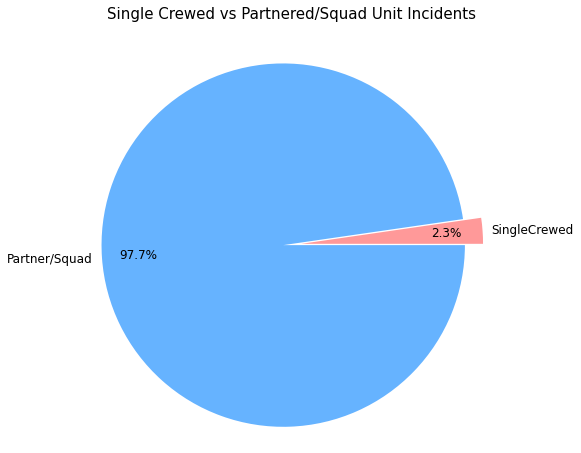

In [28]:
pie, ax = plt.subplots(figsize = (8,8))
labels = piedf.index
colors = ['#ff9999','#66b3ff']
plt.pie(x = piedf['Counts'], autopct="%.1f%%", explode=(0, 0.05), labels = labels,
       pctdistance = 0.8, colors = colors, labeldistance = 1.05, textprops = {'fontsize': 12}, radius = 0.5)
plt.title('Single Crewed vs Partnered/Squad Unit Incidents', fontsize = 15)
ax.axis('square')
plt.tight_layout()

- We can see that only 2.3% of units deployed were composed of only 1 person.

# Single Crew Likeliness of Force Usage

In [45]:
singleforce = single[single['SingleCrewed'] == 1]
counts = dict(singleforce['Was Force Needed?'].value_counts())
yes = counts.get(1)
no = counts.get(0)
piedf = pd.DataFrame([yes, no], index = ['Force Required', 'No Force Required'], columns = ['Counts'])
piedf

,Counts
Force Required,2065
No Force Required,1322


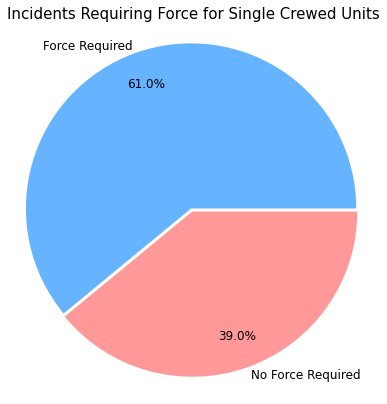

In [46]:
pie, ax = plt.subplots(figsize = (6,6))
labels = piedf.index
colors = ['#66b3ff','#ff9999']
plt.pie(x = piedf['Counts'], autopct="%.1f%%", explode=(0, 0.01), labels = labels,
       pctdistance = 0.8, colors = colors, labeldistance = 1.05, textprops = {'fontsize': 12}, radius = 0.5)
plt.title('Incidents Requiring Force for Single Crewed Units', fontsize = 15)
ax.axis('square')
plt.tight_layout()

- From the data, we see that 61% of the time required usage of force for single-crewed units.

# Crew/Squad Likeliness of Force Usage

In [51]:
crewforce = single[single['SingleCrewed'] == 0]
counts = dict(crewforce['Was Force Needed?'].value_counts())
yes = counts.get(1)
no = counts.get(0)
piedf = pd.DataFrame([yes, no], index = ['Force Required', 'No Force Required'], columns = ['Counts'])
piedf

,Counts
Force Required,65885
No Force Required,78623


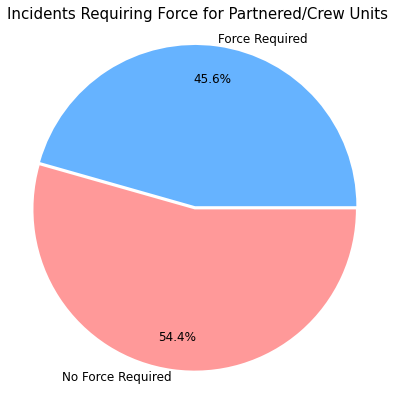

In [52]:
pie, ax = plt.subplots(figsize = (6,6))
labels = piedf.index
colors = ['#66b3ff','#ff9999']
plt.pie(x = piedf['Counts'], autopct="%.1f%%", explode=(0, 0.01), labels = labels,
       pctdistance = 0.8, colors = colors, labeldistance = 1.05, textprops = {'fontsize': 12}, radius = 0.5)
plt.title('Incidents Requiring Force for Partnered/Crew Units', fontsize = 15)
ax.axis('square')
plt.tight_layout()

- Data suggests that for partnered units only 45.6% of units required usage of force.

# Conclusion

- Of all recorded incidents, only 2.3% of those were single crewed units.
- However, of all single-crew unit incidents, at least 61% of those units required usage of Force.
- Contrasts to squad or partnered units, in which 45% of incidents required force.
- Single units are required to use force more than 1.35x more likely to use force.
- However, the sample size for single units is not adjusted and therefore this statistic is not totally accurate.

Lets try bootstrapping single crewed

In [53]:
single

,SingleCrewed,Was Force Needed?
0,0,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
147890,0,1
147891,0,0
147892,0,1
147893,0,0


In [54]:
singlecrew = single[single['SingleCrewed'] == 1]
singlecrew

,SingleCrewed,Was Force Needed?
29,1,0
58,1,0
65,1,1
84,1,1
110,1,1
...,...,...
147694,1,1
147738,1,1
147816,1,1
147842,1,1


In [81]:
np.random.seed(seed = 77)
bs_sample = np.random.choice(singlecrew.iloc[1], size = 150000, )
bs_df = pd.DataFrame(bs_sample, columns = ['Was Force Needed?'])
print(bs_df['Was Force Needed?'].value_counts())
bs_df = dict(bs_df['Was Force Needed?'].value_counts())
yes = bs_df.get(1)
no = bs_df.get(0)
piedf = pd.DataFrame([yes, no], index = ['Force Required', 'No Force Required'], columns = ['Counts'])
piedf

1    75116
0    74884
Name: Was Force Needed?, dtype: int64


,Counts
Force Required,75116
No Force Required,74884


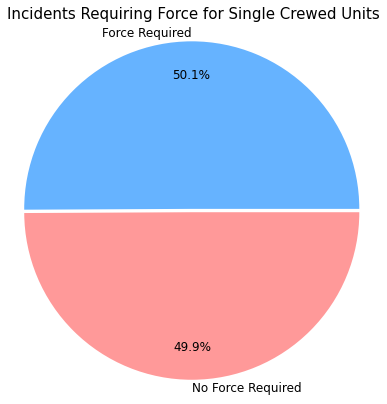

In [82]:
pie, ax = plt.subplots(figsize = (6,6))
labels = piedf.index
colors = ['#66b3ff','#ff9999']
plt.pie(x = piedf['Counts'], autopct="%.1f%%", explode=(0, 0.01), labels = labels,
       pctdistance = 0.8, colors = colors, labeldistance = 1.05, textprops = {'fontsize': 12}, radius = 0.5)
plt.title('Incidents Requiring Force for Single Crewed Units', fontsize = 15)
ax.axis('square')
plt.tight_layout()